# Project Data Analysis for Finance : Performa Cabang

## Latar Belakang

DQLab Finance merupakan perusahaan finance yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada Januari 2020, DQLab Finance konsisten menyalurkan pembiayaan untuk masyarakat dan semakin berkembang setiap bulannya dengan membuka cabang baru.

Walaupun berumur kurang dari 1 tahun, DQLab Finance sudah mempunyai banyak cabang, oleh karena itu perlu dipantau bagaimana performa dari cabang - cabang tersebut.

Pada masing-masing cabang, terdapat agen-agen yang bertugas mencari dan mendata calon mitra yang akan mengajukan pinjaman kepada DQLab Finance. Lalu jika sudah disetujui, agen juga yang akan memberikan uang tersebut kepada mitra.

## Tugas dan langkah

#### Tugas :
Menganalisis performa cabang dari cabang-cabang yang ada di DQLab Finance pada bulan Mei 2020.
#### Langkah yang akan dilakukan :
1. Memfilter data untuk bulan Mei 2020
2. Membuat summary per cabang untuk melihat data 5 cabang terbaik dan terburuk
3. Karena cabang bertambah setiap bulannya, maka perlu dicek umur cabang dan performa mei
4. Mencari cabang terburuk untuk masing - masing kelompok umur

## Dataset yang digunakan 

In [2]:
# Menyimpan hasil pada dataframe df_loan
# Menggunakan fungsi read.csv() untuk membaca file csv
# Menggunakan stringsAsFactors agar data-data yang bertipe character tidak diubah menjadi factor
# Menggunakan fungsi glimpse dari package dplyr untuk melihat data
df_loan <- read.csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/loan_disbursement.csv', stringsAsFactors = F)
dplyr::glimpse(df_loan)

Rows: 9,754
Columns: 5
$ loan_id      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...
$ tanggal_cair <chr> "2020-01-06", "2020-01-06", "2020-01-06", "2020-01-06"...
$ cabang       <chr> "AA", "AA", "AA", "AA", "AA", "AA", "AB", "AB", "AB", ...
$ agen         <chr> "AA-1", "AA-1", "AA-1", "AA-2", "AA-2", "AA-2", "AB-1"...
$ amount       <int> 320000, 440000, 200000, 430000, 360000, 220000, 320000...


Dari hasil diatas, dapat dilihat bahwa pada dataframe terdapat 9,754 baris data dan 5 kolom (variabel).
  - loan_id : unik ID dari data ini
  - tanggal_cair : tanggal uang diberikan kepada mitra
  - cabang : lokasi agen bekerja dan tempat mitra terdaftar
  - agen : petugas lapangan yang melakukan pencairan
  - amount : jumlah uang yang dicairkan

In [3]:
df_loan

loan_id,tanggal_cair,cabang,agen,amount
1,2020-01-06,AA,AA-1,320000
2,2020-01-06,AA,AA-1,440000
3,2020-01-06,AA,AA-1,200000
4,2020-01-06,AA,AA-2,430000
5,2020-01-06,AA,AA-2,360000
6,2020-01-06,AA,AA-2,220000
7,2020-01-06,AB,AB-1,320000
8,2020-01-06,AB,AB-1,470000
9,2020-01-06,AB,AB-1,470000
10,2020-01-06,AB,AB-2,350000


## Summary data bulan lalu (Mei 2020)

### Memfilter data bulan Mei 2020, dan menjumlahkan data per cabang

In [4]:
# load package dplyr 
library(dplyr)
# Menggunakan pipe %>% untuk menyambungkan fungsi
# Menyimpan hasil pada dataframe df_loan_mei
# Memfilter data dengan tanggal cair lebih besar sama dengan 1 Mei dan lebih kecil sama dengan 31 Mei menggunakan fungsi filter()
# Kelompokkan data berdasarkan cabang menggunakan group_by()
# Menampilkan ringkasan nilai menggunakan fungsi summarise()
df_loan_mei <- df_loan %>%
    filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>%
    group_by(cabang) %>%
    summarise(total_amount = sum(amount))
# Tampilkan hasil 
df_loan_mei

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

`summarise()` ungrouping output (override with `.groups` argument)


cabang,total_amount
AA,75710000
AB,81440000
AC,83990000
AD,76080000
AE,54200000
AF,68040000
AG,74080000
AH,73840000
AI,46640000
AJ,43580000


### Menampilkan data 5 cabang dengan total amount paling besar

In [5]:
library(dplyr)
# Menggunakan package Scales untuk memformat value data numerik menjadi format yang mudah dibaca
library(scales)
# Menggunakan dataframe df_loan_mei dari hasil sebelumnya
# Mengurutkan data total_amount dari yang terbesar menggunakan fungsi arrange() dan desc()
# Menggunakan fungsi mutate() untuk membuat variabel baru berdasarkan variabel yang ada
# Menggunakan fungsi comma() untuk mengubah numerik menjadi ada simbol ribuan
# Menampilkan 5 data teratas menggunakan fungsi head()
df_loan_mei %>%
    arrange(desc(total_amount)) %>%
    mutate(total_amount = comma(total_amount)) %>%
    head(5)

Warning message:
"package 'scales' was built under R version 3.6.3"

cabang,total_amount
AC,"83,990,000"
AB,"81,440,000"
AD,"76,080,000"
AA,"75,710,000"
AG,"74,080,000"


### Menampilkan data 5 cabang dengan total amount paling kecil

In [6]:
library(dplyr)
library(scales)
df_loan_mei %>%
    arrange(total_amount) %>%
    mutate(total_amount = comma(total_amount)) %>%
    head(5)

cabang,total_amount
AV,"30,280,000"
AS,"31,740,000"
AT,"34,840,000"
AU,"35,610,000"
AO,"39,120,000"


dari 2 data diatas, terlihat perbedaan yang sangat signifikan antara 5 cabang dengan total amount terbesar dan 5 cabang dengan total amount terkecil. Hal ini mungkin karena umur cabang yang berbeda-beda karena ada pertumbuhan cabang baru setiap bulannya.

## Melihat hubungan umur cabang dengan total amount

### Menghitung umur cabang (dalam bulan)

Karena data umur cabang tidak tersedia, maka perlu dihitung terlebih dahulu dengan menghitung sudah berapa lama sejak tanggal cair pertama sampai dengan bulan Mei.

In [7]:
library(dplyr)
# Menyimpan hasil pada dataframe df_cabang_umur
# Mencari tanggal pertama_cair berdasarkan nilai terkecil tanggal_cair
# Untuk memudahkan cara perhitungan umur dengan membagi jumlah selisih hari dengan 30, karena itu tanggal batas nya menggunakan tanggal tengah bulan (2020-05-15), agar tidak terlalu mempengaruhi presisi perhitungan
df_cabang_umur <- df_loan %>%
  group_by(cabang) %>% 
  summarise(pertama_cair = min(tanggal_cair)) %>% 
  mutate(umur = as.numeric(as.Date('2020-05-15') - as.Date(pertama_cair)) %/% 30) 
df_cabang_umur

`summarise()` ungrouping output (override with `.groups` argument)


cabang,pertama_cair,umur
AA,2020-01-06,4
AB,2020-01-06,4
AC,2020-01-06,4
AD,2020-01-06,4
AE,2020-02-03,3
AF,2020-02-03,3
AG,2020-02-03,3
AH,2020-02-03,3
AI,2020-03-02,2
AJ,2020-03-02,2


### Gabungkan data umur dan performa Mei

In [8]:
library(dplyr)
# Menyimpan hasil pada dataframe df_loan_mei_umur
# Menggabungkan df_cabang_umur dengan df_loan_mei menggunakan fungsi inner_join()
df_loan_mei_umur <- df_cabang_umur %>%
    inner_join(df_loan_mei, by = 'cabang')
df_loan_mei_umur

cabang,pertama_cair,umur,total_amount
AA,2020-01-06,4,75710000
AB,2020-01-06,4,81440000
AC,2020-01-06,4,83990000
AD,2020-01-06,4,76080000
AE,2020-02-03,3,54200000
AF,2020-02-03,3,68040000
AG,2020-02-03,3,74080000
AH,2020-02-03,3,73840000
AI,2020-03-02,2,46640000
AJ,2020-03-02,2,43580000


### Plot relasi umur dan performa Mei

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

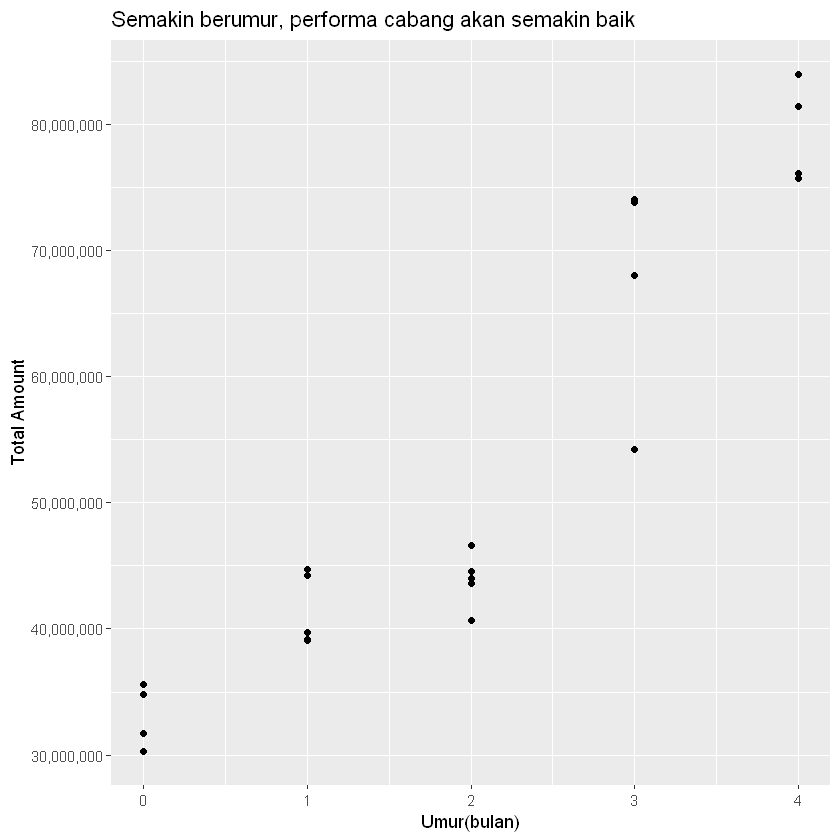

In [10]:
# Menggunakan package ggplot2
library(ggplot2)

ggplot(df_loan_mei_umur, aes(x = umur, y = total_amount)) +
    geom_point() +
    scale_y_continuous(labels = scales::comma) +
    labs(title = "Semakin berumur, performa cabang akan semakin baik",
        x = "Umur(bulan)",
        y = "Total Amount")

#### Kesimpulan :
Terlihat bahwa ada pola semakin tua cabang, maka performanya semakin baik. Hal ini karena cabang tersebut masih berkembang sehingga belum sampai pada performa maksimal. Akan tetapi pada masing-masing umur itu juga ada cabang yang performanya dibawah yang lain. 

## Cabang dengan performa rendah pada kelompok umur

### Mencari cabang yang performa rendah untuk setiap umur

In [11]:
library(dplyr)
library(scales)
# Menyimpan hasil pada dataframe df_loan_mei_flag
# Mengelompokkan berdasarkan umur
# Hitung nilai Quartile dan Inter Quartile Range
df_loan_mei_flag <- df_loan_mei_umur %>% 
  group_by(umur) %>% 
  mutate(Q1 = quantile(total_amount, 0.25), 
         Q3 = quantile(total_amount, 0.75), 
         IQR = (Q3-Q1)) %>%
# Buat flag dengan ketentuan rendah untuk total_amount lebih kecil dari (Q1 -IQR)
  mutate(flag = ifelse(total_amount < (Q1 - IQR), 'rendah','baik'))
# Tampilkan hasil flag rendah
df_loan_mei_flag %>% 
  filter(flag == 'rendah') %>% 
  mutate_if(is.numeric, funs(comma))

`mutate_if()` ignored the following grouping variables:
Column `umur`
Warning message:
"`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."

cabang,pertama_cair,umur,total_amount,Q1,Q3,IQR,flag
AE,2020-02-03,3,"54,200,000","64,580,000","73,900,000","9,320,000",rendah
AL,2020-03-02,2,"40,650,000","43,580,000","44,590,000","1,010,000",rendah


### Buat Scatterplot lagi dan beri warna merah pada cabang yang rendah

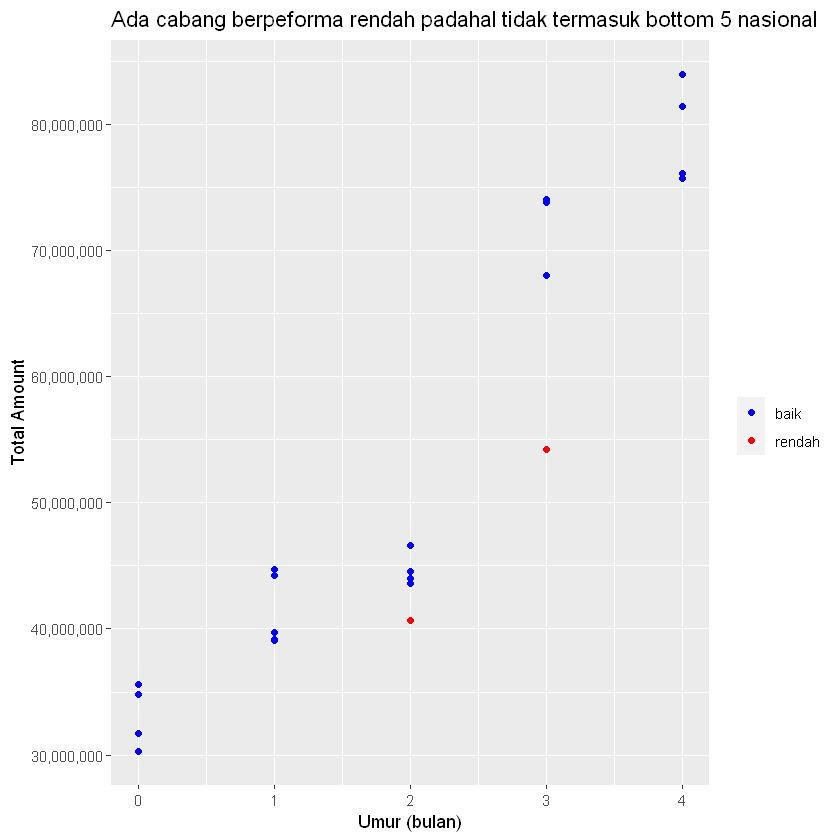

In [12]:
library(ggplot2)

ggplot(df_loan_mei_flag, aes(x = umur, y = total_amount)) +
  geom_point(aes(color = flag)) +
  scale_color_manual(breaks = c("baik", "rendah"),
                        values=c("blue", "red")) +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Ada cabang berpeforma rendah padahal tidak termasuk bottom 5 nasional",
       color = "",
       x = "Umur (bulan)",
       y = "Total Amount")

## Analisis cabang dengan performa rendah 

### Lihat perbandingan performa cabang di umur yang sama
Akan dilihat hanya untuk yang umur 3 bulan saja, dilihat detail performa pada bulan mei dengan menghitung, 
- Jumlah hari pencairan dalam 1 bulan
- Jumlah agen yang aktif
- Total loan yang cair
- Rata-rata amount cair per loan

In [13]:
library(dplyr)
library(scales)
df_loan_mei_flag %>% 
  filter(umur == 3) %>% 
  inner_join(df_loan, by = 'cabang') %>% 
  filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>% 
  group_by(cabang, flag) %>% 
  summarise(jumlah_hari = n_distinct(tanggal_cair),
            agen_aktif = n_distinct(agen),
            total_loan_cair = n_distinct(loan_id),
            avg_amount = mean(amount), 
            total_amount = sum(amount)) %>% 
  arrange(total_amount) %>% 
  mutate_if(is.numeric, funs(comma))

`summarise()` regrouping output by 'cabang' (override with `.groups` argument)
`mutate_if()` ignored the following grouping variables:
Column `cabang`


cabang,flag,jumlah_hari,agen_aktif,total_loan_cair,avg_amount,total_amount
AE,rendah,21,3,175,"309,714","54,200,000"
AF,baik,21,3,225,"302,400","68,040,000"
AH,baik,21,3,241,"306,390","73,840,000"
AG,baik,21,3,241,"307,386","74,080,000"


### Lihat perbandingan performa agen pada cabang yang rendah

Dari hasil eksplorasi sebelumnya, terlihat bahwa yang berbeda jauh hanya total_loan_cair saja.
Jumlah hari dan jumlah agen dalam 1 bulan sama semua.

Selanjutnya perlu dilihat bagaimana perbandingan nya per agent.

Untuk melanjutkan tadi, dilihat untuk yang umur 3 bulan dan flag nya rendah dilihat detail performa pada bulan mei per agen dengan mengihitung,
- jumlah hari pencairan dalam 1 bulan,
- total loan yang cair,
- rata - rata amount cair per loan
- total amount cair

In [14]:
library(dplyr)
library(scales)
df_loan_mei_flag %>% 
  filter(umur == 3, flag == 'rendah') %>% 
  inner_join(df_loan, by = 'cabang') %>% 
  filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>% 
  group_by(cabang, agen) %>% 
  summarise(jumlah_hari = n_distinct(tanggal_cair),
            total_loan_cair = n_distinct(loan_id),
            avg_amount = mean(amount), 
            total_amount = sum(amount)) %>% 
  arrange(total_amount) %>% 
  mutate_if(is.numeric, funs(comma))

`summarise()` regrouping output by 'cabang' (override with `.groups` argument)
`mutate_if()` ignored the following grouping variables:
Column `cabang`


cabang,agen,jumlah_hari,total_loan_cair,avg_amount,total_amount
AE,AE-3,4.0,16,"310,625","4,970,000"
AE,AE-2,18.0,73,"320,274","23,380,000"
AE,AE-1,21.0,86,"300,581","25,850,000"


### Lihat perbandingan performa agen pada cabang yang paling baik umur 3 bulan

Pada tabel sebelumnya, terlihat pula bahwa ada cabang yang punya 3 agen, tapi performa nya jauh diatas cabang AE, bahkan yang paling tinggi diantara cabang lain pada umur tersebut, lebih tinggi dari yang mempunyai 4 agen cabang tersebut adalah cabang AH.

Dengan cara yang hampir sama, akan dilihat bagaimana performa masing-masing agen dari cabang AH tersebut.

In [15]:
library(dplyr)
library(scales)
df_loan %>% 
  filter(cabang == 'AH') %>% 
  filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>% 
  group_by(cabang, agen) %>% 
  summarise(jumlah_hari = n_distinct(tanggal_cair),
            total_loan_cair = n_distinct(loan_id),
            avg_amount = mean(amount), 
            total_amount = sum(amount)) %>% 
  arrange(total_amount) %>% 
  mutate_if(is.numeric, funs(comma))

`summarise()` regrouping output by 'cabang' (override with `.groups` argument)
`mutate_if()` ignored the following grouping variables:
Column `cabang`


cabang,agen,jumlah_hari,total_loan_cair,avg_amount,total_amount
AH,AH-3,19.0,74.0,"303,649","22,470,000"
AH,AH-1,21.0,81.0,"301,358","24,410,000"
AH,AH-2,21.0,86.0,"313,488","26,960,000"


#### Kesimpulan :
Berdasarkan analisis tersebut, dapat disimpulkan bahwa rendahnya performa dari cabang AE adalah karena salah satu agen yang melakukan pencairan hanya 4 hari dalam 1 bulan, padahal agen lain bisa aktif 21 hari. Hal ini membuat total amount dari agen tersebut hanya 20% dibandingkan agen yang lainnya.

Sedangkan pada cabang AH, performanya sangat baik karena ketiga agen melakukan pencairan hampir / selalu setiap hari kerja. 2 orang full 21 hari 1 orang 19 hari. Sehingga performa nya terjaga dengan baik.

Perlu diperhatikan juga bahwa untuk membandingkan performa cabang itu sebaiknya di kelompokkan dulu berdasarkan karakteristik yang sama. Tidak langsung semua cabang dibandingkan tanpa mengetahui karakteristik nya. Apalagi ketika dalam real world nanti cabang ini bisa terletak di berbeda wilayah (pulau misalnya) yang mempunyai kultur yang berbeda

Selanjutnya perlu dianalisis lebih lanjut kenapa ada agen yang hanya aktif beberapa hari saja dalam sebulan. Untuk kedepannya setiap agen agar dipastikan untuk bisa aktif setiap hari nya, sehingga bisa menjaga performa cabang.